In [2]:
import os
os.getcwd()

'/Users/liujinglei/Desktop'

In [3]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.base import clone, BaseEstimator, TransformerMixin

get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('House-Price-Prediction-clean.csv')

In [4]:
dataset

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [5]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if self.additional==1:
            X["HouseArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            # X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["WoodDeckSF"] + ["OpenPorchSF"] + ["PoolArea"]
            # X["HouseAge"] = X["YrSold"] - X["YearBuilt"]
        elif self.additional == 2:
            X["HouseArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["WoodDeckSF"] + X["OpenPorchSF"] + X["PoolArea"]
            # X["HouseAge"] = X["YrSold"] - X["YearBuilt"]
        else :
            X["HouseArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["WoodDeckSF"] + X["OpenPorchSF"] + X["PoolArea"]
            X["HouseAge"]  = X["YrSold"] - X["YearBuilt"]

        return X

In [6]:
# PIPELINE
pipe = Pipeline([('add_feature', CombinedAttributesAdder(additional=3))])
full_data = pd.read_csv('House-Price-Prediction-clean.csv')

FullDataPipe = pipe.fit_transform(full_data.drop('Id',1))

/var/folders/mm/ws64ts1j4vj4yjq605hnx32w0000gn/T/ipykernel_72838/1007000735.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  FullDataPipe = pipe.fit_transform(full_data.drop('Id',1))


In [7]:
corr_matrix = FullDataPipe.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
TotalArea        0.813495
OverallQual      0.790982
HouseArea        0.782260
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
MiscVal         -0.021190
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
HouseAge        -0.523350
Name: SalePrice, dtype: float64

In [8]:
label_1 =  FullDataPipe[FullDataPipe['SalePrice']>100000]
label_2 = label_1[label_1['SalePrice']<400000]

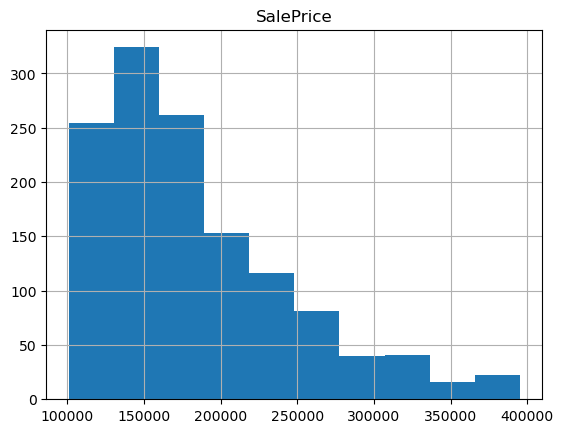

In [9]:
# hist of SalePrice
label_2.hist('SalePrice',bins=10)
plt.show()

In [10]:
df_reg = label_2[['SalePrice', 'TotalArea', 'OverallQual', 'HouseArea', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'HouseAge']]
df_reg_low = label_2[['SalePrice','TotalArea','TotalBsmtSF','MiscVal','LotArea','BsmtUnfSF','BsmtFinSF1']]
df_reg_high= label_2[['SalePrice','KitchenAbvGr','BedroomAbvGr','OverallQual','BsmtFullBath','GarageCars']]

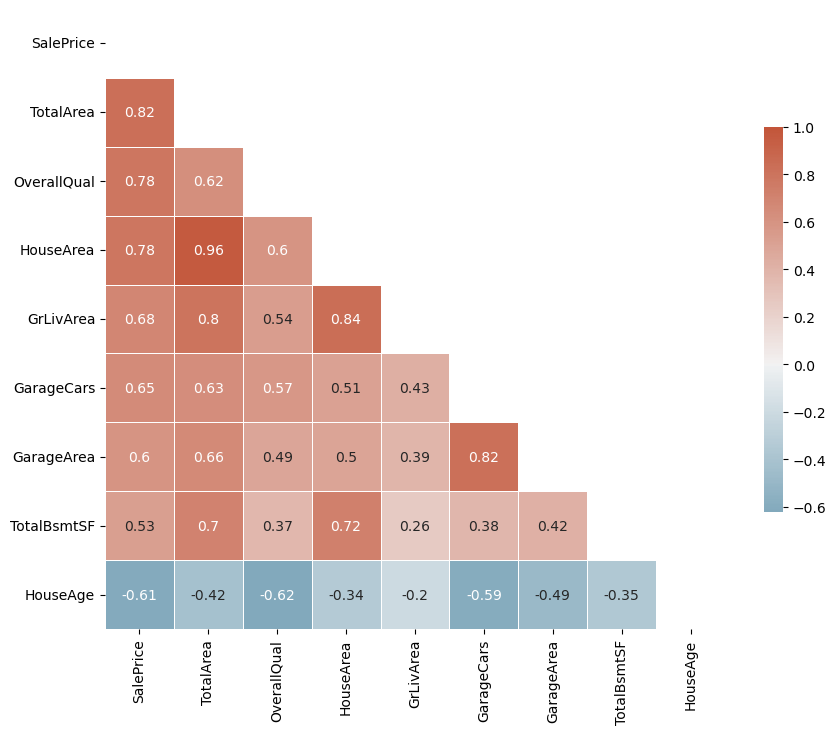

In [11]:
f, ax = plt.subplots(figsize=(10, 10))
mat = df_reg.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### do split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [13]:
# X = df_reg_high.drop('SalePrice', 1)
# y = df_reg_high['SalePrice']

# X = df_reg_low.drop('SalePrice', 1)
# y = df_reg_low['SalePrice']

X = df_reg.drop('SalePrice', 1)
y = df_reg['SalePrice']/10000

# X = label_2.drop('SalePrice', 1)
# y = label_2['SalePrice']

# Creating training and testing sub datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# print(y_test)

/var/folders/mm/ws64ts1j4vj4yjq605hnx32w0000gn/T/ipykernel_72838/885773913.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_reg.drop('SalePrice', 1)


In [14]:
from sklearn.feature_selection import f_regression as fr 
result = fr(X,y)
pvalue = result[1]

pvalue_table = pd.DataFrame(pvalue, X.columns, columns=['P-Value'])
pvalue_table.sort_values(by=['P-Value'], axis=0)

,P-Value
OverallQual,4.125132e-263
TotalArea,2.749542e-246
HouseArea,7.577438e-203
GrLivArea,2.413902e-143
GarageCars,1.549255e-138
GarageArea,1.772740e-124
TotalBsmtSF,4.422240e-95
HouseAge,3.414690e-88


#### z = (x - u) / s
where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
def print_evaluate(true, predicted):  
    # mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    # print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')


### Linear Regression

In [17]:
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # add x0 = 1 to each instance

In [18]:
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_b, y_train)
# lin_reg.intercept_

LinearRegression(fit_intercept=False)

In [19]:
# coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
# coeff_df.sort_values(by=['Coefficient'], axis=0)
lin_reg.coef_

array([18.38096447,  2.03822502,  2.26181039,  2.34747832, -0.67163829,
        0.85060072, -0.25133872, -1.39366265, -0.78183743])

In [20]:
# y_pred = lin_reg.predict(X_b)
# print_evaluate(y_test, y_pred)
# # #Metrics to evaluate model 
# # # r2_linreg = r2_score(y_test, y_pred)
# # # mse_linreg = mean_squared_error(y_test, y_pred)
# # # print(r2_linreg)
# # # print(mse_linreg)


We will use the inv() function from NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication

In [21]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
print(theta_best)

[18.38096447  2.03822502  2.26181039  2.34747832 -0.67163829  0.85060072
 -0.25133872 -1.39366265 -0.78183743]


# Linear regression using batch gradient descent

In [22]:
eta = 0.1  # learning rate
theta = np.random.randn(X_train.shape[1]+1,1)  # random initialization of the weights
m = y_train.size      #batch size is 100 samples 
#n_iter = 100
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
def gradient_descent(X_train, y_train, m, theta, eta, n_iter):
    # theta_list = []
    # theta =  X_b.T.dot(X_b.dot(theta) - y[1])
    for i in range(1, n_iter):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - np.array(y_train).reshape(y_train.size,1))# This is the gradient descent iteration  - m is for the batch version
        theta = theta - eta * gradients   
        # theta_list.append(theta)


    return theta

In [23]:
theta1 = gradient_descent(X_train, y_train, m, theta, 0.1, 100000)

print(theta1)


[[18.38096447]
 [ 2.03822502]
 [ 2.26181039]
 [ 2.34747832]
 [-0.67163829]
 [ 0.85060072]
 [-0.25133872]
 [-1.39366265]
 [-0.78183743]]


In [24]:
lin_reg.predict(X_b)

array([11.35552566,  8.74177326, 22.64365549, ..., 30.11004109,
       18.91545125, 11.31191297])

In [25]:
#dot product of training set and theta
a = np.dot(X_b, theta1).reshape((-1))
#predicted value of training set
b = lin_reg.predict(X_b)
np.allclose(a,b,rtol=1e-15, atol=1e-08, equal_nan=False)

True

In [26]:
lin_reg.predict(X_b)

array([11.35552566,  8.74177326, 22.64365549, ..., 30.11004109,
       18.91545125, 11.31191297])

In [27]:
# alpha = 0.0001
# m = y_train.size
# np.random.seed(10)
# theta = np.random.rand(X_train.shape[1])
# def gradient_descent_2(x, y, m, theta, alpha):
#     cost_list = []
#     theta_list = []
#     prediction_list = []
#     run = True
#     cost_list.append(1e10)
#     i=0
#     while run:
#         prediction = np.dot(x, theta)
#         prediction_list.append(prediction)
#         error = prediction - y
#         cost = 1/(2*m) * np.dot(error.T, error)
#         cost_list.append(cost)
#         theta = theta - (alpha * (1/m) * np.dot(x.T, error))
#         theta_list.append(theta)
#         if cost_list[i]-cost_list[i+1] < 1e-5:
#             run = False
        
#         i+=1
#     cost_list.pop(0)
#     return prediction_list, cost_list, theta_list

In [28]:
# prediction_list, cost_list, theta_list = gradient_descent_2(X_train, y_train, m, theta, alpha)
# theta = theta_list[-1]
# print(theta)

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_train, y_train)

In [30]:
X_new_b = np.c_[np.ones((X_pca.size)), X_pca]  # add x0 = 1 to each instance

In [31]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_new_b)
    plt.plot(X_new_b, y_train, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new_b, y_predict, style)
        gradients = 2/m * X_new_b.T.dot(X_new_b.dot(theta) - np.array(y_train).reshape(y_train.size,1))
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 5, 0, 2])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

/var/folders/mm/ws64ts1j4vj4yjq605hnx32w0000gn/T/ipykernel_72838/1535460202.py:12: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


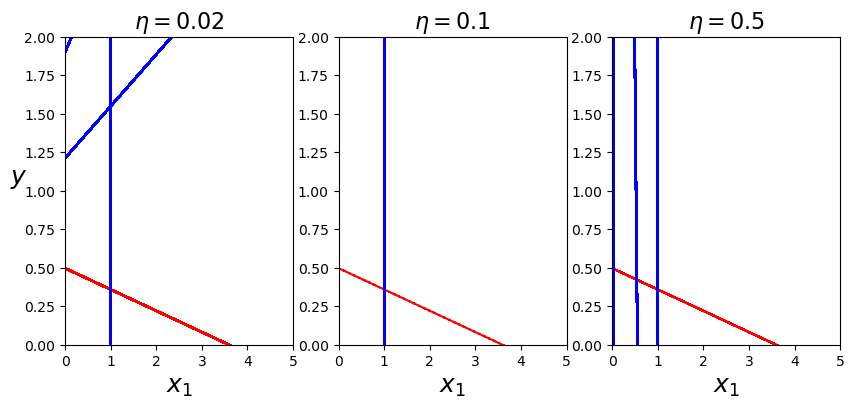

In [32]:
np.random.seed(42)
# theta = np.random.randn(2,1)  # random initialization
theta = np.random.randn(X_new_b.shape[1],1)  # random initialization of the weights

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [33]:

X = df_reg.drop('SalePrice', 1)
y = df_reg['SalePrice']/10000

# X = label_2.drop('SalePrice', 1)
# y = label_2['SalePrice']

# Creating training and testing sub datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

/var/folders/mm/ws64ts1j4vj4yjq605hnx32w0000gn/T/ipykernel_72838/2471672205.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_reg.drop('SalePrice', 1)


LinearRegression()

In [34]:
y_pred_test = lin_reg.predict(X_test)
print("MSE for test set:"+"\n")
print_evaluate(y_test, y_pred_test)

y_pred_train = lin_reg.predict(X_train)
print("MSE for train set:"+"\n")
print_evaluate(y_train, y_pred_train)

MSE for test set:

MSE: 12.56347592002775
RMSE: 3.5444993891983887
R2 Square 0.7060705174870822
__________________________________
MSE for train set:

MSE: 9.121298187293096
RMSE: 3.020148702844464
R2 Square 0.7565946194480354
__________________________________


# Regression MLP

In [2]:
! pip install tensorflow==2.10.0

In [1]:

import tensorflow as tf
from tensorflow import keras

: 

: 

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)